In [29]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Top 10 highest paid skills for Data Analysts

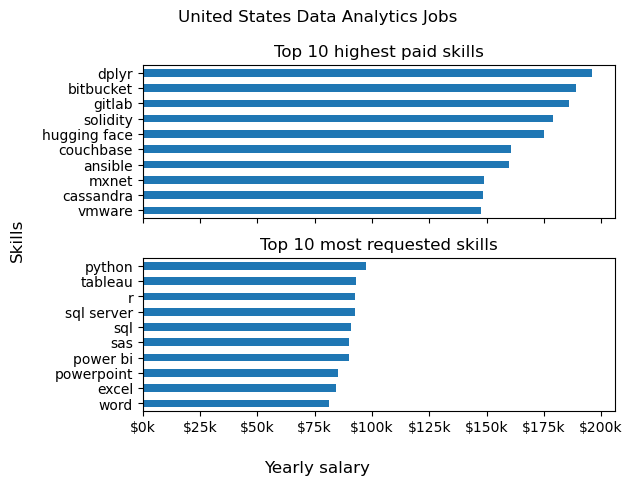

In [39]:
df_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_exp = df_DA.explode('job_skills')
df_US_DA_grouped = df_DA_exp.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

fig, ax = plt.subplots(2, 1, sharex=True)

top_paid = df_US_DA_grouped.sort_values(by='median', ascending=False).head(10)
top_paid.plot(kind='barh', y='median', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest paid skills')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

top_frquent = df_US_DA_grouped.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
top_frquent.plot(kind='barh', y='median', ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_title('Top 10 most requested skills')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

# Remove legends
ax[1].get_legend().set_visible(False)
ax[0].get_legend().set_visible(False)


fig.suptitle('United States Data Analytics Jobs')
fig.supylabel('Skills')
fig.supxlabel('Yearly salary')

plt.tight_layout()
plt.show()
